# 410. Split Array Largest Sum

### Difficulty: <font color = red> Hard </font>

---
Given an integer array `nums` and an integer `k`, split `nums` into `k` non-empty subarrays such that the largest sum of any subarray is **minimized**.

Return *the minimized largest sum of the split*.

A subarray is a contiguous part of the array.

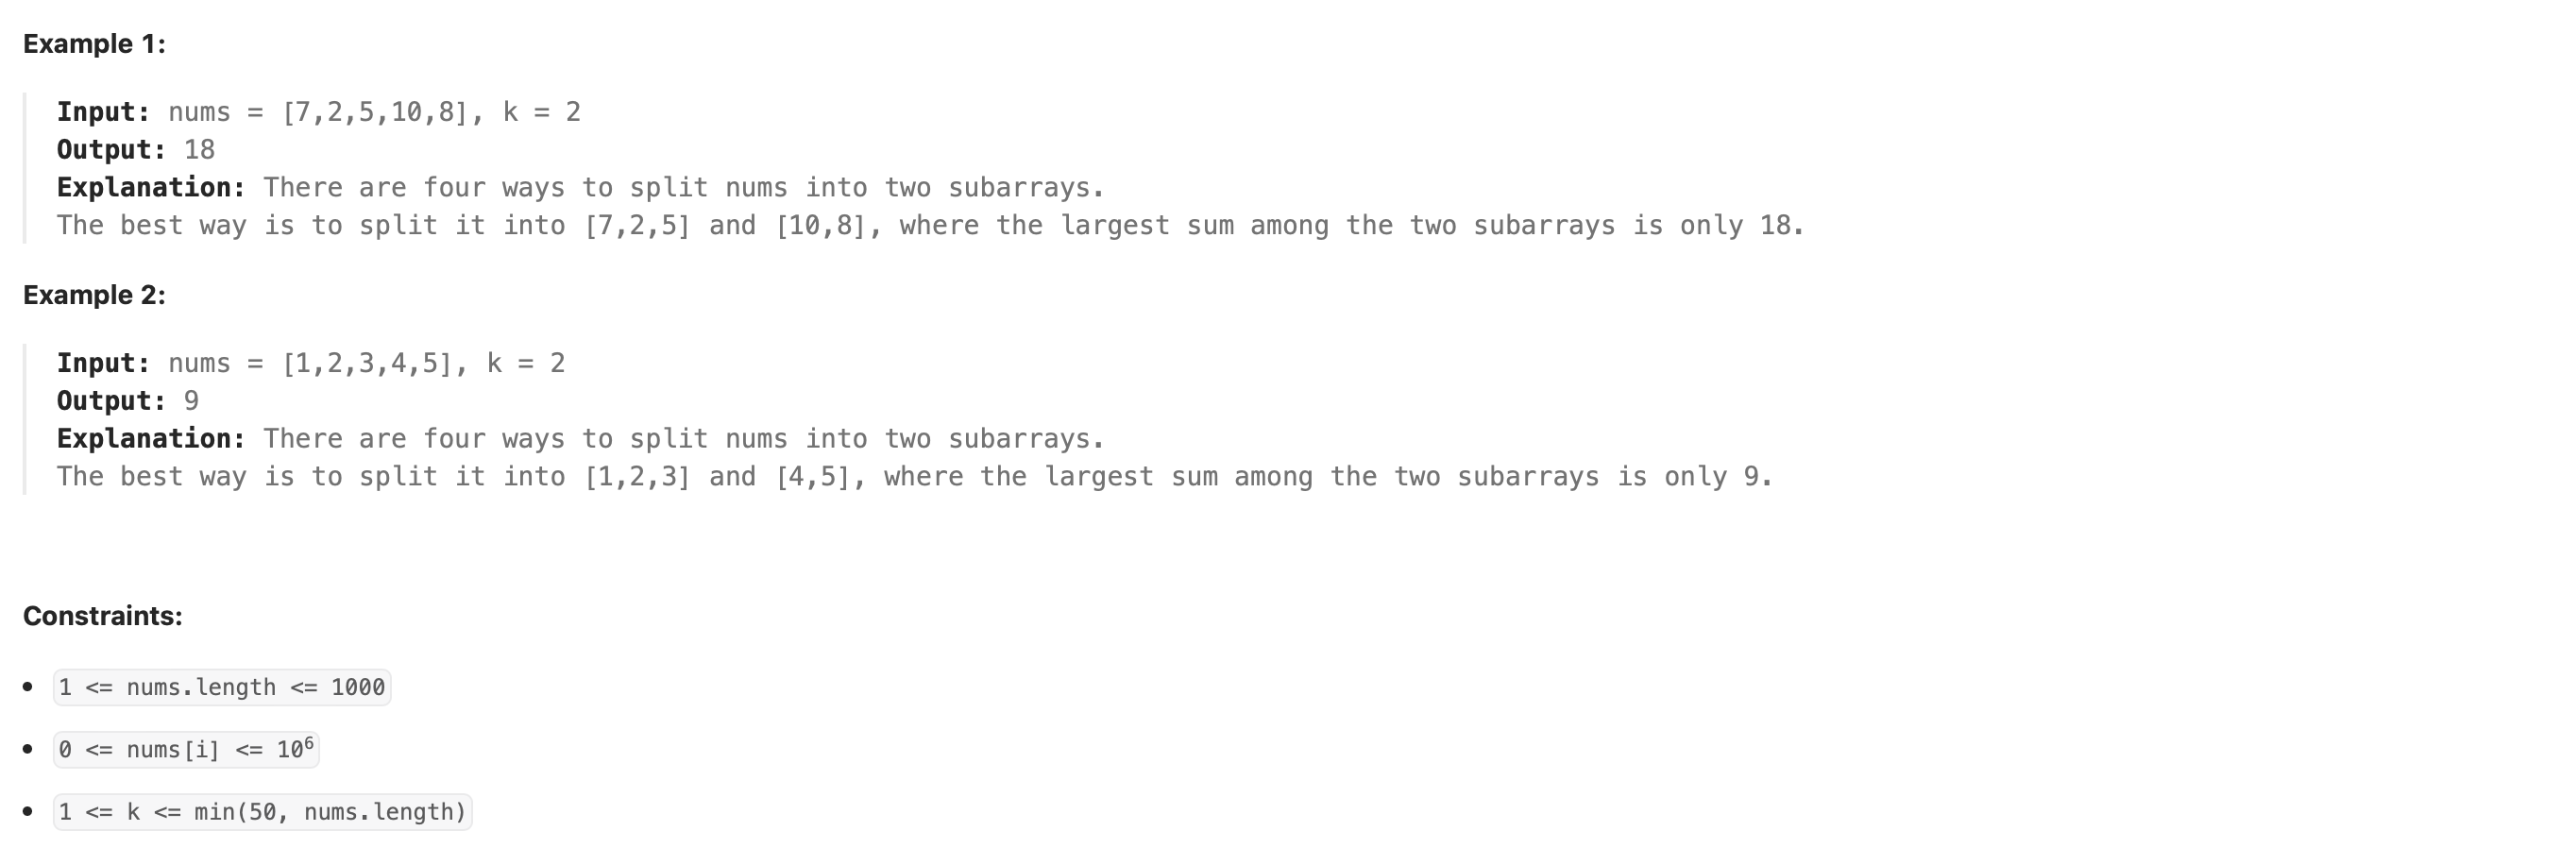

## Approach Overview:

Define a range of possible maximum subarray sum and then search through that range to find the smallest one that will allow us to split `nums` into `k` subarrays, such that out of those `k` subarrays, the one with the largest sum equals that value (i.e. the smallest possible largest subarray sum).

**SLIGHTLY MORE REFINED CHATGPT SOLUTION OVERVIEW DESCRIPTION**:

Define a range of possible maximum subarray sums and then search through that range to find the smallest one that will allow us to split nums into k subarrays. The goal is to ensure that out of those k subarrays, the one with the largest sum equals this value, which is the smallest possible largest subarray sum.

## Detailed Explanation:

This was an interesting one. We're given an aray of integer values called `nums` and are told to split `nums` into `k` subarrays. And further we are told to figure out which subarray has the smallest possible largest sum. 

Again, our goal is to try and split `nums` into `k` subarrays and find out which split configuration will yield us the subarray with the the smallest possible largest sum. 

Like the question said we trying to find which split will give us the minimized largest sum. And then return that minimized largest sum value.

To solve this we needed to firstly realize that our minimized largest sum solution value lies within a fixed range. 

At the very minimum, the smallest possible largest sum a split can have, is the largest integer element in `nums`.

Example: This extreme case occurs when `k = length of nums` (i.e., when each subarray contains a single element). In this case, the subarray with the largest sum is simply **the largest integer element in nums**.

And at the very maximum, the smallest possible largest sum a split can have is the sum of all elements in `nums` 

Example: This extreme case occurs when `k = 1` (i.e. when the entire array is one subarray). In this case, `nums` is its own subarray and therefore the largest sum is simply **the sum of every element in the subarray (sum of `nums`)**.

#### Finding out if we can split `nums` into `k` subarrays (such that sum of each subarray is <= current threshold value).

We then use a helper function to help us figure out if its even possible to split `nums` into `k` subarray such that each subarray's sum is less than or equals the trial solution sum value. 

OK so this last part is crucial and deserves an explanation of its own because the question didn't 'reveal' this key piece of info to us. 

We had to figure it out on our own.

The key insight that allow us to solve this subarray splitting problem is realizing that the sum of every subarray in the split must be less than or equal to the threshold value. This is the key condition. This is what makes a subarray valid. 

Once this running subarray total (sum) is exceeded we increment the count of the number of valid subarrays seen so far and we then start looking for a new subarray.

**Few key notes:**

- If for a trial threshold value / trial sum solution (i.e. mid), we find that the sum of every subarray in `nums` < threshold and that number of subarrays we can form is less than `k`, this essentially means it's feasible to split `nums` into `k` subarrays. But it also means we haven't yet discovered the smallest possible solution (since the largest sum in subarrays is < threshold). Which means a smaller solution exists, so we thus need to narrow down our search range inorder to look for it. 

`def feasible(threshold):`

`Feasible` finds out if we can split `nums` into `k` valid subarrays.

If we can then it returns `True`. And if we can't we return `False`.

## Key Challenges:

- Realizing that the sum solution must lie within a fixed range. 

## Solution:

In [ ]:
class Solution:
    def splitArray(self, nums: List[int], k: int) -> int:

        def feasible(threshold):
            # Helper function to check if we can split `nums` into `k` subarrays 
            # with each subarray sum less than or equal to `threshold`.

            # initialize count of subarrays
            count = 1

            # variable to store the running total of the current subarray
            total = 0

            # loop through every element in nums
            for number in nums:

                # calculate the running total of current subarray
                total += number

               # check if running total (sum) exceeds threshold
                if total > threshold:

                    # if it does then increment `count`
                    count += 1
                    
                    # look at next new subarray and initialize its total 
                    total = number

            # check if count <= k
            if count <= k:
                # we can split `nums` into k subarrays, so return True
                return True
            # else we cannot split `nums` into k subarrays, so return False
            else:
                return False    


        # initialize lower bound of search space (smallest sum) 
        left = max(nums)

        # initialize upper bound of search space (largest sum)
        right = sum(nums) 

        # loop until left & right pointers meet
        while left < right:

            # calculate the middle value of the current range 
            mid = left + (right - left) // 2
            
            # check if current trial sum (mid) is valid
            # i.e. if we can split `nums` in k subarrays, each having a maximum sum that's <= mid
            if feasible(mid) == True:
                # narrow search range by adjusting the right bound
                right = mid
                
            # otherwise sum (mid) is too small 
            else:
                # if not possible (to split nums into k subarrays), increase the lower bound (left) to mid + 1 to explore larger sums.
                # narrow search range by adjusting the left bound
                left = mid + 1    

        # return left (minimized largest sum)
        return left        